In [178]:
# Assignment 12

# EDA 2

In [179]:
import pandas as pd

df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [181]:
df['age'].isnull().sum()

np.int64(0)

In [182]:
num_feats = df.select_dtypes(include='int64')
num_feats.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [183]:
# standardization (Z-score)
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std_scaler = StandardScaler().fit_transform(num_feats)

print(std_scaler.mean())
print(std_scaler.std())

-5.164515242055129e-18
1.0


In [184]:
mm_scaler = MinMaxScaler().fit_transform(num_feats)

print(mm_scaler.mean())
print(mm_scaler.std())

0.24246746231555694
0.25082876020950773


1. Standard scaling vs MinMax scaling

- Standard scaling (z-score) : mean ~ 0 , std = 1
  * Models that assume normality (linear regression, logistic regression, PCA)
  * Distance-based models (KNN, K-means)
  * Neural nets (helps with gradient convergence)

- MinMax scaling : range [0,1] usually
  * Models that require bounded inputs (neural nets with sigmoid/tanh)
  * Image/percentage data (naturally 0–1)
  * Gradient-descent models (convergence is faster if values are small and bounded

In [185]:
# encoding

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

cat_feats = df.select_dtypes('object').columns

to_ohe_cols = []
to_le_cols = []

for col in cat_feats:
    if df[col].nunique()<5:
        to_ohe_cols.append(col)
    else:
        to_le_cols.append(col)

print(f'to_ohe_cols : {to_ohe_cols}')
print(f'to_le_cols : {to_le_cols}')

to_ohe_cols : ['sex', 'income']
to_le_cols : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [186]:
# One-Hot Encoding

encoder = OneHotEncoder(sparse_output=False)

ohe_ct = ColumnTransformer([
    ('one-hot',encoder,to_ohe_cols),
])

transformed_ohe = ohe_ct.fit_transform(df)

df_ohe_t = pd.DataFrame(transformed_ohe,columns=ohe_ct.get_feature_names_out())

df = df.drop(columns=to_ohe_cols)
df = pd.concat([df, df_ohe_t], axis=1)

In [187]:
# Label encoding

for col in to_le_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [188]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,one-hot__sex_ Female,one-hot__sex_ Male,one-hot__income_ <=50K,one-hot__income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32561 non-null  int64  
 1   workclass               32561 non-null  int64  
 2   fnlwgt                  32561 non-null  int64  
 3   education               32561 non-null  int64  
 4   education_num           32561 non-null  int64  
 5   marital_status          32561 non-null  int64  
 6   occupation              32561 non-null  int64  
 7   relationship            32561 non-null  int64  
 8   race                    32561 non-null  int64  
 9   capital_gain            32561 non-null  int64  
 10  capital_loss            32561 non-null  int64  
 11  hours_per_week          32561 non-null  int64  
 12  native_country          32561 non-null  int64  
 13  one-hot__sex_ Female    32561 non-null  float64
 14  one-hot__sex_ Male      32561 non-null

2. Label encoder vs One-Hot encoder

   - Label Encoder :
       - Each category is replaced with a single integer
       - ex : ['red', 'green', 'blue', 'green'] >> [2, 1, 0, 1] in ALPHABETICAL order
       - Tree-based models (Decision Tree, Random Forest, XGBoost), since they don’t assume order in numbers.
       * pros : simple, memory efficient (only 1 column)
       * cons : introduces artificial ordering (implies red > green > blue)
   - One-Hot encoder :
       - Creates a binary column per category
       - ex : red : [0,0,1] , green : [0,1,0] , blue : [1,0,0] in ALPHABETICAL order
       - Linear models , NNs
       * pros : avoids false ordering
       * cons : increases dimensionality (many dummy vars)

In [190]:
# creating rational features

# 2 new rationale numerical features 

df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, 100], labels=['young', 'adult', 'senior', 'elder'])

df['net_capital'] = df['capital_gain'] - df['capital_loss']

# 2 new rationale categorical features 

# df['education_occupation'] = df['education'].str.strip() + '_' + df['occupation'].str.strip()

* segregating 'age' into 'age_group' to capture more info. 
    - rationale : improves interpretability (ex :More Aged = more exprienced = more income ) and can reduce noise
     
* creating 'net_capital'
    - rationale : reducing features yet keeping info about net loss or gain
 
* combining 'education' & 'occupation'
    - rationale : The impact of an education level on income is often highly dependent on the occupation


In [191]:
# checking for skewness
print(df['capital_gain'].skew())

print(df['capital_loss'].skew())

print(df['hours_per_week'].skew())

11.953847687699804
4.594629121679695
0.227642536804501


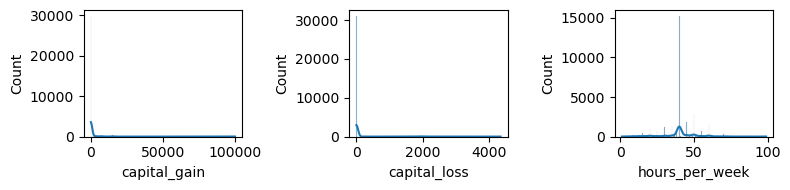

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,2))

plt.subplot(131)
sns.histplot(df['capital_gain'],kde=True)

plt.subplot(132)
sns.histplot(df['capital_loss'],kde=True)

plt.subplot(133)
sns.histplot(df['hours_per_week'],kde=True)

plt.tight_layout()

In [193]:
# applying log transformation

import numpy as np

df['capital_gain'] = np.log1p(df['capital_gain'])

print(df['capital_gain'].skew())

3.096143524467517


* log transformation :
   - 'capital_gain' is more right skewed
   - Linear models, perform best when num_feats have normal distribution
   - log transformation compresses the range of the data, pulling the large outlier values closer to the rest of the data and making the distribution more symmetrical


   * np.log()   : for +ve values
   * np.log1p() : for values >= -1

In [194]:
# isolation forest for Anomaly/outliers detection

df.drop(['one-hot__income_ <=50K','age_group'],axis=1,inplace=True)

X = df.drop('one-hot__income_ >50K', axis=1)

In [198]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination='auto', random_state=38)

pred = model.fit_predict(X)

outliers = df[pred==-1]
normals = df[pred==1]

# clean dataset : free from outliers
normals       

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,one-hot__sex_ Female,one-hot__sex_ Male,one-hot__income_ >50K,net_capital
0,39,7,77516,9,13,4,1,1,4,7.684784,0,40,39,0.0,1.0,0.0,2174
1,50,6,83311,9,13,2,4,0,4,0.000000,0,13,39,0.0,1.0,0.0,0
2,38,4,215646,11,9,0,6,1,4,0.000000,0,40,39,0.0,1.0,0.0,0
3,53,4,234721,1,7,2,6,0,2,0.000000,0,40,39,0.0,1.0,0.0,0
5,37,4,284582,12,14,2,4,5,4,0.000000,0,40,39,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,1,4,0.000000,0,40,39,0.0,1.0,0.0,0
32556,27,4,257302,7,12,2,13,5,4,0.000000,0,38,39,1.0,0.0,0.0,0
32557,40,4,154374,11,9,2,7,0,4,0.000000,0,40,39,0.0,1.0,1.0,0
32558,58,4,151910,11,9,6,1,4,4,0.000000,0,40,39,1.0,0.0,0.0,0


* effects of outliers on modles :
    - Violation of model assumptions, like the normality of residuals in linear regression
    - linear models : the models will shift the line of best fit towards the outlier, resulting in a model that poorly represents the majority of the data
    - Distance-Based Models : algorithms depend on calculating the distance between data points. Outliers, by definition, are far from other points and can corrupt these calculations.

In [203]:
# PPS : Predictive Power Score

!pip install -q ppscore

In [212]:
import ppscore as pps

pps_matrix_df = pps.matrix(normals)

pps_matrix_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.6400,0.747589,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,74539.8974,75269.329836,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.5502,2.607344,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.7064,1.762619,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,net_capital,native_country,0.0,regression,True,mean absolute error,1.2360,2.301326,DecisionTreeRegressor()
285,net_capital,one-hot__sex_ Female,0.0,regression,True,mean absolute error,0.2760,0.388385,DecisionTreeRegressor()
286,net_capital,one-hot__sex_ Male,0.0,regression,True,mean absolute error,0.2760,0.388385,DecisionTreeRegressor()
287,net_capital,one-hot__income_ >50K,0.0,regression,True,mean absolute error,0.2278,0.297238,DecisionTreeRegressor()


In [213]:
normals.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,one-hot__sex_ Female,one-hot__sex_ Male,one-hot__income_ >50K,net_capital
age,1.000000,0.046924,-0.084282,0.008058,0.068171,-0.384087,-0.004220,-0.324216,0.039235,0.076819,0.037422,0.141230,0.010244,-0.146190,0.146190,0.264594,0.079827
workclass,0.046924,1.000000,-0.015439,-0.020833,0.014005,-0.048172,0.193564,-0.094985,0.042697,0.031095,0.010444,0.110471,-0.017109,-0.076568,0.076568,0.028646,0.027289
fnlwgt,-0.084282,-0.015439,1.000000,-0.016541,-0.028782,0.037192,0.000255,0.006355,-0.033553,-0.014577,-0.024549,-0.024810,-0.060827,-0.032001,0.032001,-0.011464,-0.011171
education,0.008058,-0.020833,-0.016541,1.000000,0.281522,-0.012505,-0.037992,0.024670,-0.020906,0.012494,0.013244,0.028545,0.051260,0.075681,-0.075681,0.049655,0.006679
education_num,0.068171,0.014005,-0.028782,0.281522,1.000000,-0.029110,0.101618,-0.084271,0.025091,0.069146,0.068678,0.120549,0.050018,0.021868,-0.021868,0.306074,0.080179
marital_status,-0.384087,-0.048172,0.037192,-0.012505,-0.029110,1.000000,-0.001441,0.215594,-0.074866,-0.060886,-0.047039,-0.182697,-0.007474,0.105738,-0.105738,-0.199354,-0.053481
occupation,-0.004220,0.193564,0.000255,-0.037992,0.101618,-0.001441,1.000000,-0.078826,0.001784,0.006124,0.007989,0.055598,0.004130,-0.073803,0.073803,0.062828,0.002262
relationship,-0.324216,-0.094985,0.006355,0.024670,-0.084271,0.215594,-0.078826,1.000000,-0.082909,-0.140594,-0.106214,-0.266859,0.061593,0.569443,-0.569443,-0.285551,-0.116847
race,0.039235,0.042697,-0.033553,-0.020906,0.025091,-0.074866,0.001784,-0.082909,1.000000,0.049081,0.046592,0.042232,0.048765,-0.051301,0.051301,0.078742,0.037437
capital_gain,0.076819,0.031095,-0.014577,0.012494,0.069146,-0.060886,0.006124,-0.140594,0.049081,1.000000,-0.032965,0.065268,0.038141,-0.119429,0.119429,0.211899,0.867153
